<a href="https://colab.research.google.com/github/SandeeeeeeeeepDey/data-science-11-weeks-progg/blob/main/california_housing_wide_deep_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#California housing using wide & deep architecture

#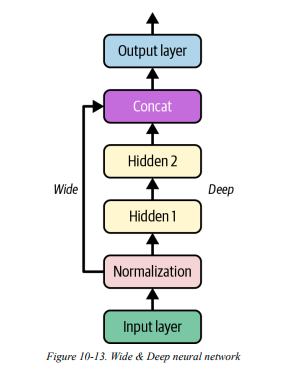

In [1]:
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [2]:
cali_init = fetch_california_housing()

In [3]:
data = pd.DataFrame(cali_init["data"], columns = cali_init["feature_names"])
target = pd.Series(cali_init["target"], name = cali_init["target_names"][0])

In [4]:
train_size = int(len(data)*0.8)
test_size = int(len(data)*0.1)

In [27]:
X_train, y_train = data[:train_size], target[:train_size]
X_test, y_test = data[train_size:train_size+test_size], target[train_size:train_size+test_size]
X_valid, y_valid = data[train_size+test_size:], target[train_size+test_size:]

Make layers

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = "relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation = "relu")
concat_layer = tf.keras.layers.Concatenate()  # Keep in mind the difference between .Concatinate and .concatinate
output_layer = tf.keras.layers.Dense(1)

Call Layers

In [ ]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [ ]:
model = tf.keras.Model(inputs = [input_], outputs = [output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)

In [104]:
model.compile(loss = "mse", optimizer = optimizer, metrics = "RootMeanSquaredError")

In [105]:
normalization_layer.adapt(X_train)

In [106]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
516/516 [==============================] - 2s 2ms/step - loss: 1.2212 - root_mean_squared_error: 1.1051 - val_loss: 3.1458 - val_root_mean_squared_error: 1.7737
Epoch 2/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4767 - root_mean_squared_error: 0.6904 - val_loss: 0.3644 - val_root_mean_squared_error: 0.6037
Epoch 3/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3746 - root_mean_squared_error: 0.6121 - val_loss: 0.2779 - val_root_mean_squared_error: 0.5271
Epoch 4/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3551 - root_mean_squared_error: 0.5959 - val_loss: 0.2760 - val_root_mean_squared_error: 0.5253
Epoch 5/20
516/516 [==============================] - 1s 3ms/step - loss: 0.3442 - root_mean_squared_error: 0.5867 - val_loss: 0.3330 - val_root_mean_squared_error: 0.5771
Epoch 6/20
516/516 [==============================] - 2s 3ms/step - loss: 0.3300 - root_mean_squared_error: 0.5744 - val_loss: 0.5241 - val_

In [107]:
model.evaluate(X_valid, y_valid)

65/65 [==============================] - 0s 3ms/step - loss: 0.2880 - root_mean_squared_error: 0.5367


[0.2880299389362335, 0.5366842150688171]

In [108]:
model.predict(X_test[:3])

1/1 [==============================] - 0s 104ms/step


array([[1.0355068 ],
       [1.3763465 ],
       [0.91227067]], dtype=float32)

#Wide and Deep(passing possibly overlapping subsets through selective layers)

#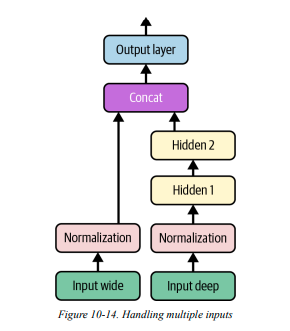

In [42]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])

In [43]:
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1_ = tf.keras.layers.Dense(30, activation = "relu")(norm_deep)
hidden2_ = tf.keras.layers.Dense(30, activation = "relu")(hidden1_)
concat_ = tf.keras.layers.concatenate([norm_wide, hidden2_])
output_ = tf.keras.layers.Dense(1)(concat_)

In [44]:
model_dnw = tf.keras.Model(inputs = [input_wide, input_deep], outputs = [output_])

In [45]:
optimizer_ = tf.keras.optimizers.Adam(learning_rate = 1e-3)

In [46]:
model_dnw.compile(loss="mse", optimizer = optimizer_, metrics = ["RootMeanSquaredError"])

In [47]:
X_train_wide, X_train_deep = X_train.iloc[:, :5], X_train.iloc[:, 2:]
X_valid_wide, X_valid_deep = X_valid.iloc[:, :5], X_valid.iloc[:, 2:]
X_test_wide, X_test_deep = X_test.iloc[:, :5], X_valid.iloc[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_wide[:3]

In [48]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model_dnw.fit((X_train_wide, X_train_deep), y_train, epochs = 20, validation_data = ((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
516/516 [==============================] - 2s 3ms/step - loss: 1.1230 - root_mean_squared_error: 1.0597 - val_loss: 0.3601 - val_root_mean_squared_error: 0.6001
Epoch 2/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4349 - root_mean_squared_error: 0.6595 - val_loss: 0.3464 - val_root_mean_squared_error: 0.5886
Epoch 3/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3909 - root_mean_squared_error: 0.6252 - val_loss: 0.3270 - val_root_mean_squared_error: 0.5718
Epoch 4/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3683 - root_mean_squared_error: 0.6068 - val_loss: 0.4725 - val_root_mean_squared_error: 0.6874
Epoch 5/20
516/516 [==============================] - 1s 3ms/step - loss: 0.3768 - root_mean_squared_error: 0.6139 - val_loss: 0.4584 - val_root_mean_squared_error: 0.6771
Epoch 6/20
516/516 [==============================] - 2s 3ms/step - loss: 0.3480 - root_mean_squared_error: 0.5899 - val_loss: 0.4253 - val_

In [57]:
mse__, rmse__ = model_dnw.evaluate((X_valid_wide,X_valid_deep), y_valid)

65/65 [==============================] - 0s 2ms/step - loss: 0.3204 - root_mean_squared_error: 0.5660


In [61]:
y_pred = model_dnw.predict((X_test_wide[:3], X_test_deep[:3]))
y_pred

1/1 [==============================] - 0s 53ms/step


array([[1.1735864],
       [2.0687258],
       [1.3667786]], dtype=float32)

In [62]:
y_test[:3]

16512    1.656
16513    1.261
16514    0.944
Name: MedHouseVal, dtype: float64